<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

# **Load Dataset**

In [2]:
df = pd.read_csv('/content/ENB2012_data.csv')
print(df.head())



     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


# **information about dataset**

In [3]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


# **Statistical Summary**

In [4]:
print(df.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

# **Data Preprocessing**

In [5]:
df.isnull()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [7]:
#rename features and targets

df.rename(columns={"X1": "Relative Compactness", "X2" :"Surface Area" ,"X3": "Wall Area","X4": "Roof Area", "X5":"Overall Height","X6" :"Orientation","X7": "Glazing Area","X8" : "Glazing Area Distribution","Y1": "Heating Load","Y2": "Cooling Load"},inplace=True)

In [8]:
#Get the unique values in each column
df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

# **EDA-Exploraity Data Analysis**

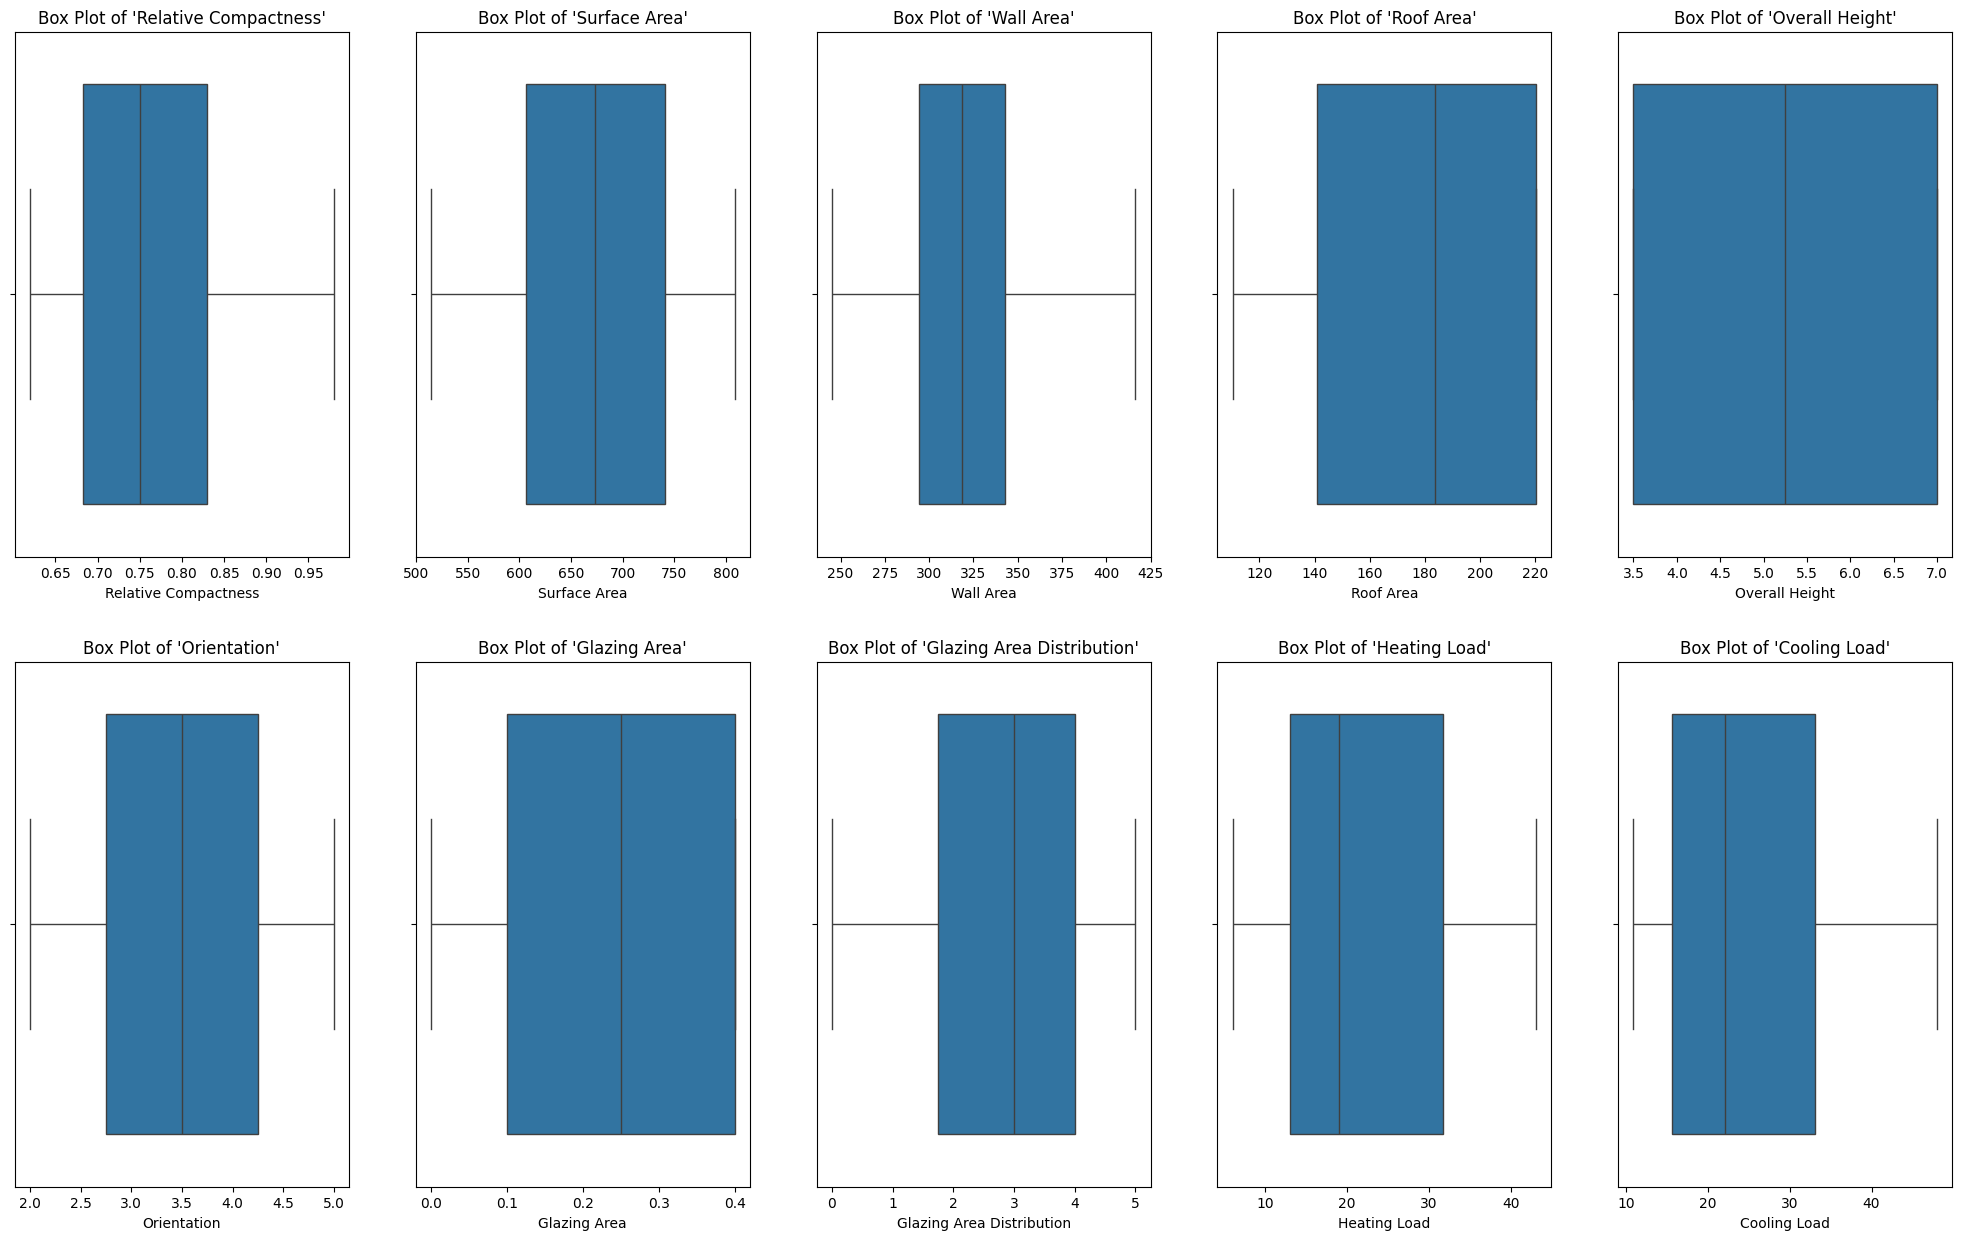

In [10]:
def box_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""

    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.boxplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Box Plot of {feat!r}")

box_plots(data=df,features=df.columns,n_rows=2, n_cols=5, figsize=(25,15))

In [11]:
#plot the histogram of the features to see the didtribution of their values

def Hist_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.histplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Hist Plot of {feat!r}")

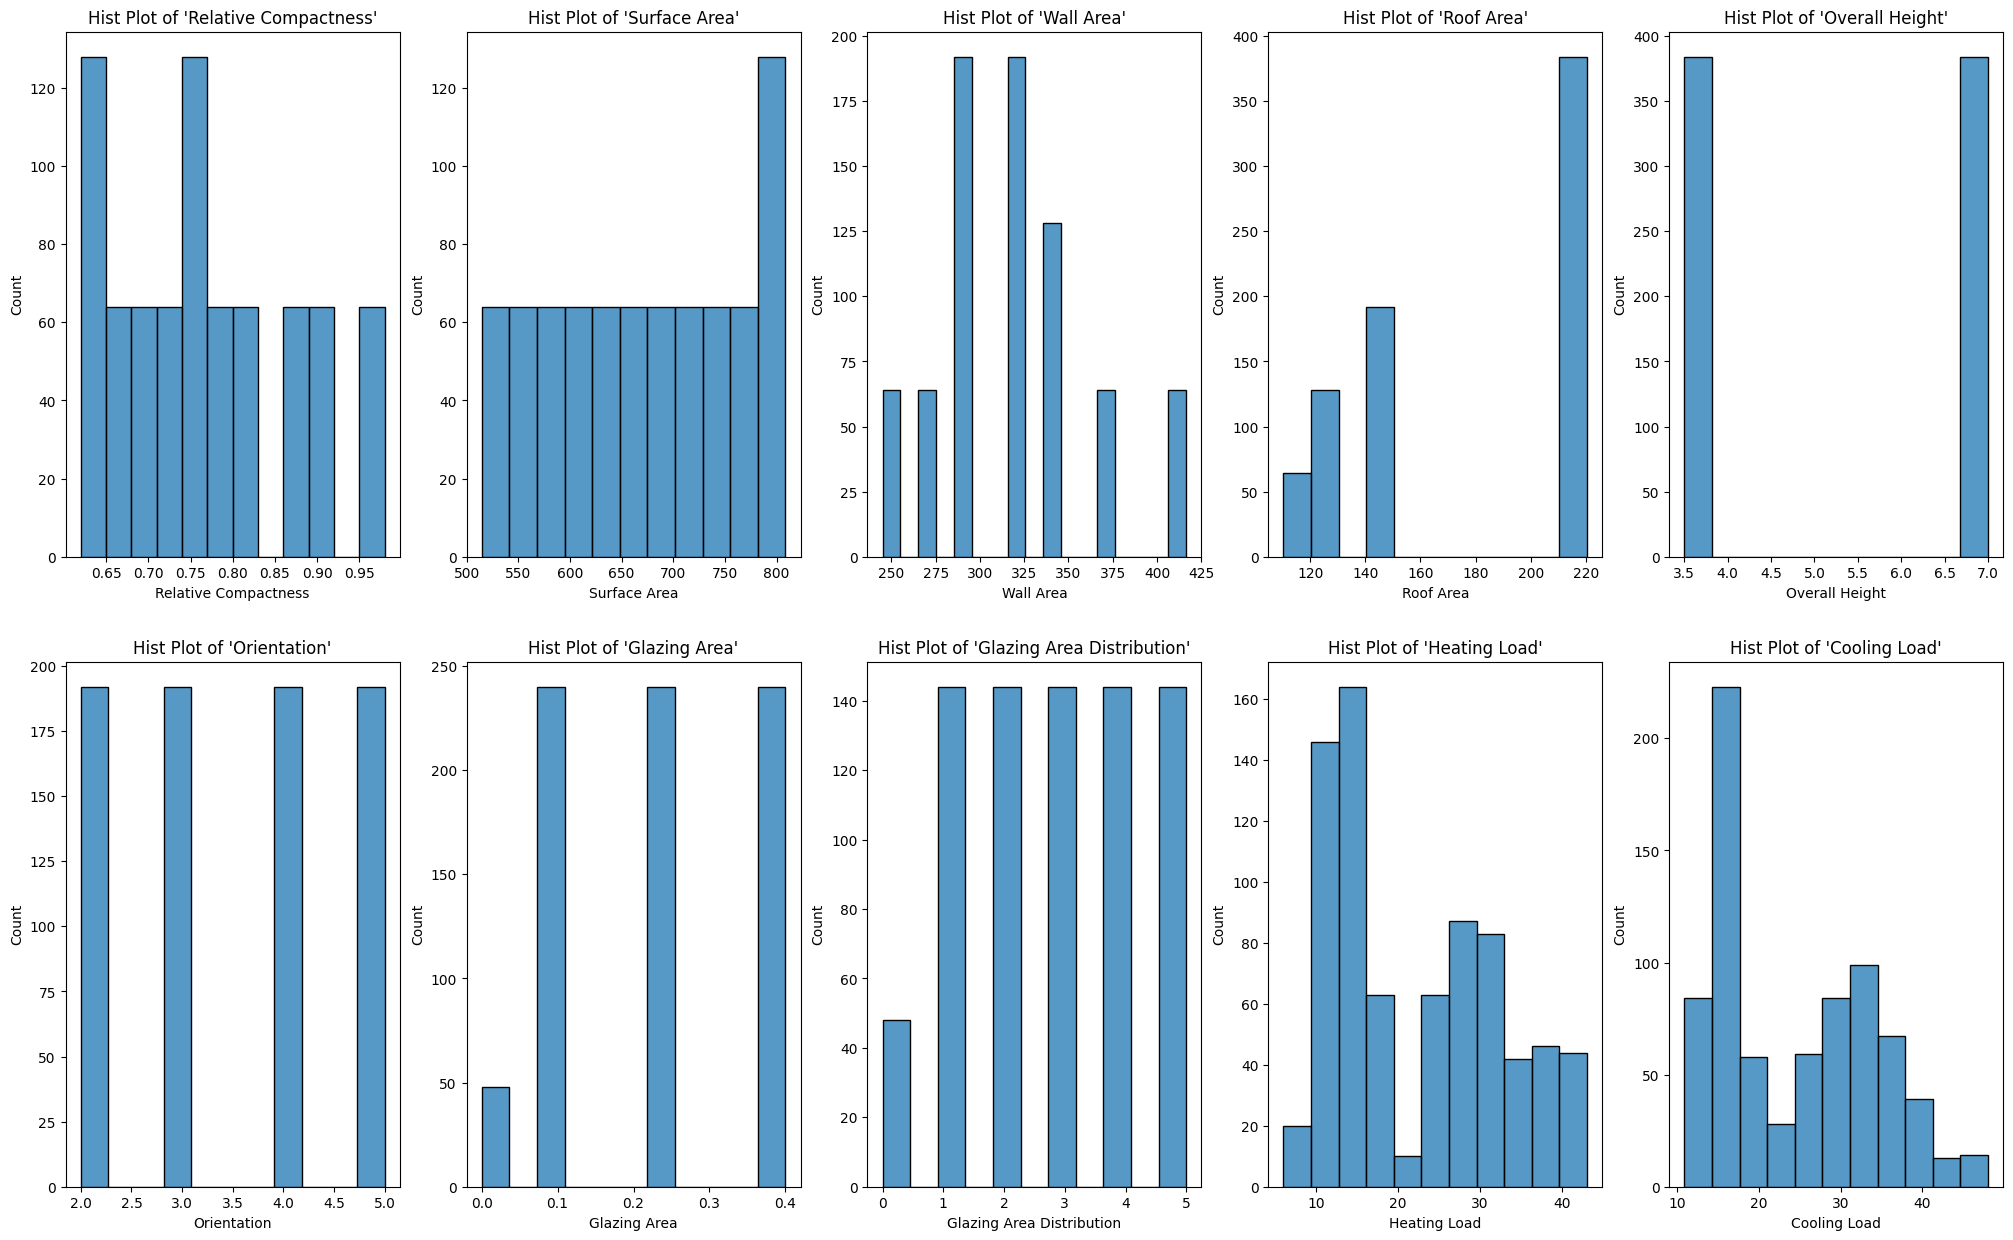

In [12]:
#plotting the histogram distribution for the features
Hist_plots(data=df,features=df.columns,n_rows=2, n_cols=5, figsize=(25,15))

Text(0.5, 1.0, 'Cooling Load Vs Overall Height')

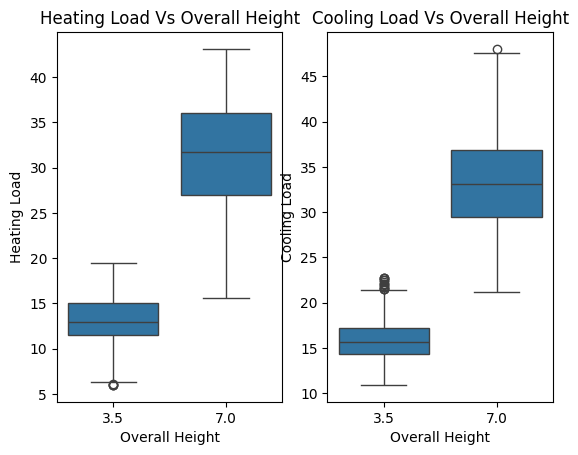

In [14]:
#relationship between categorical features and target values

fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Overall Height", y= "Heating Load", ax=ax[0])
ax[0].set_title("Heating Load Vs Overall Height") #set title for axis 0

sns.boxplot(data=df, x="Overall Height", y="Cooling Load", ax=ax[1])
ax[1].set_title("Cooling Load Vs Overall Height") #set title for axis 1

<Figure size 1000x1000 with 0 Axes>

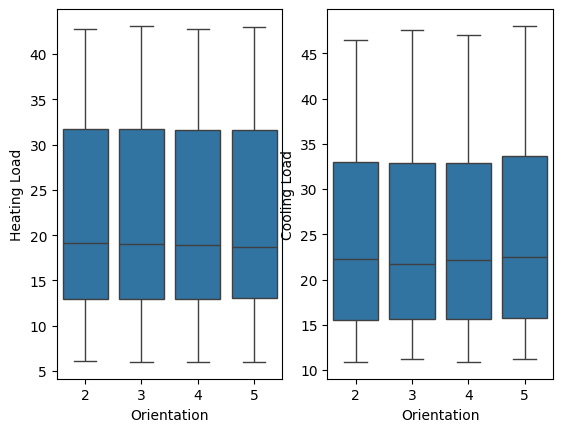

In [16]:
#relationship between categorical features, orientation and target values
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Orientation", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df, x="Orientation", y="Cooling Load", ax=ax[1]);

In [17]:
def Scatter_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
    y
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.scatterplot(data=data, x=feat, ax=ax, y=y)

        slope, intercept = np.polyfit(data[feat], data[y], 1) #get the slope and intercept of the line

        line_of_best_fit = slope * data[feat] + intercept   #get the y vectors

        sns.lineplot(data, x=feat, y=line_of_best_fit, label="Line of best fit", ax=ax) #plot the line of best fit

        ax.set_title(f"Scatter Plot of {feat!r} vs {y}")

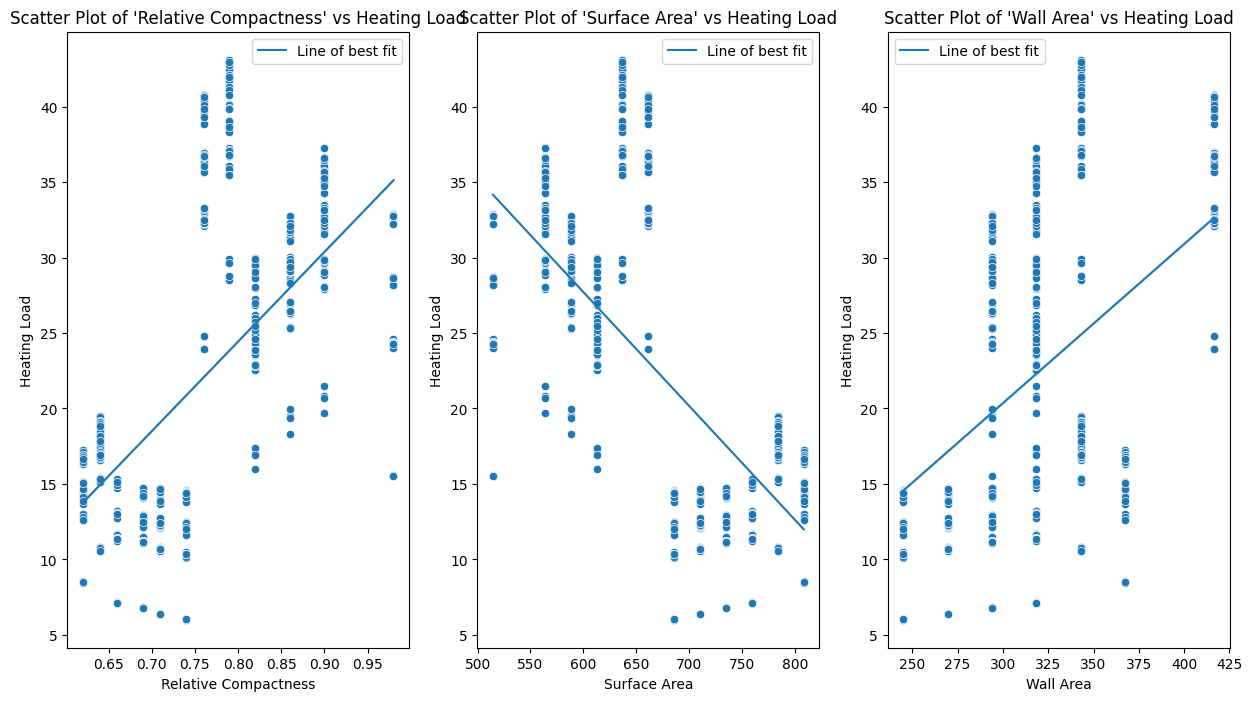

In [18]:
#checking for linear relationship between features and target variables
numerical_features=["Relative Compactness","Surface Area", "Wall Area"]
Scatter_plots(data=df, features=numerical_features,n_rows=1,n_cols=3,y="Heating Load")

In [19]:
#drop Relative Compactness
df.drop("Surface Area", inplace=True, axis=1)

In [22]:
TEST_SIZE=0.2    #test size of dataset
RANDOM_STATE=42
X=df.drop(["Heating Load", "Cooling Load"], axis=1) #drop along the column
y=df["Cooling Load"]   #subset the column Cooling Load

#split dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((614, 7), (154, 7))

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       614 non-null    float64
 1   Wall Area                  614 non-null    float64
 2   Roof Area                  614 non-null    float64
 3   Overall Height             614 non-null    float64
 4   Orientation                614 non-null    int64  
 5   Glazing Area               614 non-null    float64
 6   Glazing Area Distribution  614 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 38.4 KB


In [24]:
var_to_scale=X_train.select_dtypes(include=["float64", "int64"]).columns  #variabe to apply minmax scaler

In [29]:
# ===== Scaler =====
scaler = MinMaxScaler()

#column transformer instantiation
col_transformer = ColumnTransformer(
    transformers=[ ("scaler", scaler, var_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Orientation', 'Glazing Area', 'Glazing Area Distribution'],
      dtype='object'))])

# **Model Evaluation**

In [30]:
#libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

#libraries for modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [31]:
  #apply transformation to training set and test set
X_train_trans=col_transformer.fit_transform(X_train)
X_test_trans=col_transformer.transform(X_test)

In [32]:
#view the untransformed and transformed data

X_train

,Relative Compactness,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
60,0.82,318.5,147.00,7.0,2,0.10,1
618,0.64,343.0,220.50,3.5,4,0.40,2
346,0.86,294.0,147.00,7.0,4,0.25,2
294,0.90,318.5,122.50,7.0,4,0.25,1
231,0.66,318.5,220.50,3.5,5,0.10,4
...,...,...,...,...,...,...,...
71,0.76,416.5,122.50,7.0,5,0.10,1
106,0.86,294.0,147.00,7.0,4,0.10,2
270,0.71,269.5,220.50,3.5,4,0.10,5
435,0.98,294.0,110.25,7.0,5,0.25,4


In [33]:
#transformed train data
df_train_trans=pd.DataFrame(data=X_train_trans, columns=X_train.columns)
df_train_trans

,Relative Compactness,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.555556,0.428571,0.333333,1.0,0.000000,0.250,0.2
1,0.055556,0.571429,1.000000,0.0,0.666667,1.000,0.4
2,0.666667,0.285714,0.333333,1.0,0.666667,0.625,0.4
3,0.777778,0.428571,0.111111,1.0,0.666667,0.625,0.2
4,0.111111,0.428571,1.000000,0.0,1.000000,0.250,0.8
...,...,...,...,...,...,...,...
609,0.388889,1.000000,0.111111,1.0,1.000000,0.250,0.2
610,0.666667,0.285714,0.333333,1.0,0.666667,0.250,0.4
611,0.250000,0.142857,1.000000,0.0,0.666667,0.250,1.0
612,1.000000,0.285714,0.000000,1.0,1.000000,0.625,0.8


In [34]:
#baseline model
import numpy as np

def zero_rule_algorithm_regression(y_train, y_test):
    '''A function to calculate the prediction from a baseline model using its mean
    Params:
    y_train (pd.Dataframe): Take the target train values as input

    Return
    The predicted values i.e mean of the target values.
    '''
    prediction=np.mean(y_train)
    y_pred=[prediction]*len(y_test)
    return y_pred

#perfromance metric function

def performance_metrics(y_pred, y_test):
    '''Function to calculate the MSE, RMSE and MSE '''
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)

    return f"Mean Absoluete Error: {mae}\n Mean Square Error: {mse}\n Root Mean Sqaured Error: {rmse}\n R2: {r2} "

In [35]:
y_pred_baseline=zero_rule_algorithm_regression(y_train, y_test)

In [36]:
baseline_error_y=performance_metrics(y_pred_baseline, y_test)

print("Baseline Error for y:\n ", baseline_error_y)

Baseline Error for y:
  Mean Absoluete Error: 8.74185329328652
 Mean Square Error: 93.43635392999795
 Root Mean Sqaured Error: 9.666248182723116
 R2: -0.008408593861118474 


In [37]:
#train and evaluate different regression models
def train_and_evaluate_models(X_train,X_test, y_train, y_test):
    # Initialize different regression models
    models = [

        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("SVM", SVR()),

    ]
    #Create lists to store the results
    model_names = []
    mse_values = []
    mae_values = []
    rmse_values=[]
    r2_values = []


    # Fit and evaluate each model
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse=mean_squared_error(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        rmse=mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        model_names.append(model_name)
        mse_values.append(mse)
        mae_values.append(mae)
        rmse_values.append(rmse)
        r2_values.append(r2)


    metrics_df=pd.DataFrame({
            'Model': model_names,
            'Mean Absolute Error': mae_values,
            'Root Mean Squared Error': rmse_values,
            'Mean Squared Error': mse_values,
            'R-squared (R2)': r2_values
        })
    return metrics_df

In [38]:
train_and_evaluate_models(X_train,X_test,y_train, y_test)

,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Decision Tree,1.154610,2.017121,4.068779,0.956088
1,Random Forest,1.073808,1.737933,3.020411,0.967402
2,SVM,3.372752,4.681165,21.913310,0.763501


In [42]:
#feature importance from the models

# Create and fit a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Get feature importance for Decision Tree
dt_feature_importance = dt_model.feature_importances_

# Create and fit a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importance for Random Forest
rf_feature_importance = rf_model.feature_importances_

#feature importance
feat_import=pd.DataFrame(columns=X_train.columns, data=[dt_feature_importance,rf_feature_importance,],index=["Decision Tree", "Random forest"])
feat_import


,Relative Compactness,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
Decision Tree,0.827494,0.088297,0.008407,0.000000,0.013211,0.046011,0.016580
Random forest,0.517596,0.079692,0.094108,0.233121,0.012613,0.046526,0.016344


<ipython-input-44-3d2e119de10b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size
<ipython-input-44-3d2e119de10b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size


<Figure size 1500x1000 with 0 Axes>

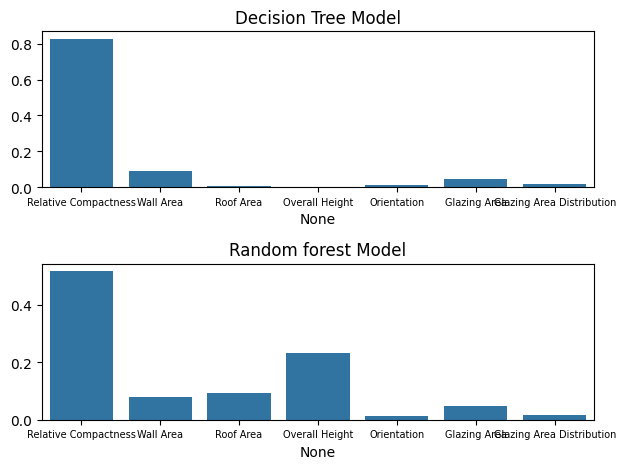

In [44]:
plt.figure(figsize=(15,10))
fig,ax=plt.subplots(nrows=2, ncols=1)
models=["Decision Tree", "Random forest"]
feat_import=[dt_feature_importance,rf_feature_importance]
for i,model in enumerate(models):
    sns.barplot( y=feat_import[i], x=X_train.columns,ax=ax[i])
    ax[i].set_title(f"{model} Model")
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size

plt.tight_layout()  #adjust spacing between subplots to minimize the overlaps.